In [1]:
# pip install numpy matplotlib ipywidgets
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import display
import ipywidgets as widgets


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import display
import ipywidgets as widgets

# Define the Mass-Spring System
class MassSpringSystem:
    def __init__(self, mass=1.0, k=20.0, damping=0.5):
        self.mass = mass
        self.k = k
        self.damping = damping
        self.position = 1.0  # Initial position
        self.velocity = 0.0  # Initial velocity

    def update(self, dt):
        # Compute force from spring (Hooke's law) and damping
        force = -self.k * self.position - self.damping * self.velocity
        # Acceleration (Newton's second law)
        acceleration = force / self.mass
        # Update velocity and position using simple Euler integration
        self.velocity += acceleration * dt
        self.position += self.velocity * dt

# Create a function to run the simulation
def run_simulation(k, damping, num_steps):
    system = MassSpringSystem(k=k, damping=damping)
    dt = 0.1  # Time step
    positions = []

    for _ in range(num_steps):
        system.update(dt)
        positions.append(system.position)

    # Plot the results
    plt.figure(figsize=(8, 4))
    plt.plot(np.arange(0, num_steps) * dt, positions, label='Position')
    plt.xlabel('Time')
    plt.ylabel('Position')
    plt.title('Spring-Mass System Simulation')
    plt.grid(True)
    plt.legend()
    plt.show()

# Create widgets for input parameters
k_slider = widgets.FloatSlider(value=20.0, min=1.0, max=50.0, step=0.1, description='Spring Constant (k)')
damping_slider = widgets.FloatSlider(value=0.5, min=0, max=10.0, step=0.1, description='Damping Coefficient')
num_steps_slider = widgets.IntSlider(value=100, min=10, max=500, step=10, description='Number of Steps')

# Widget UI
ui = widgets.VBox([k_slider, damping_slider, num_steps_slider])
out = widgets.interactive_output(run_simulation, {'k': k_slider, 'damping': damping_slider, 'num_steps': num_steps_slider})
display(ui, out)


Output()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import display
import ipywidgets as widgets
%matplotlib widget

global anim  # Global variable to hold the animation

class MassSpringSystem:
    def __init__(self, mass=1.0, k=20.0, damping=0.5, position=1.0):
        self.mass = mass
        self.k = k
        self.damping = damping
        self.position = position
        self.velocity = 0.0

    def update(self, dt):
        force = -self.k * self.position - self.damping * self.velocity
        acceleration = force / self.mass
        self.velocity += acceleration * dt
        self.position += self.velocity * dt

def animate_mass_spring(k, damping, num_steps, dt):
    global anim  # Refer to the global variable
    system = MassSpringSystem(k=k, damping=damping)
    
    fig, ax = plt.subplots()
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    line, = ax.plot([], [], 'o-', lw=2)
    time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

    def init():
        line.set_data([], [])
        time_text.set_text('')
        return line, time_text

    def animate(i):
        system.update(dt)
        line.set_data(0, system.position)
        time_text.set_text(f'Time = {i*dt:.2f}s')
        return line, time_text

    anim = FuncAnimation(fig, animate, frames=num_steps, init_func=init, blit=True, interval=dt*1000)
    plt.close(fig)  # Ensure the figure does not interfere with the widget display
    return anim

# Define the UI components and their functionality
k_slider = widgets.FloatSlider(value=20.0, min=1.0, max=50.0, step=0.1, description='Spring Constant (k)')
damping_slider = widgets.FloatSlider(value=0.5, min=0, max=10.0, step=0.1, description='Damping Coefficient')
num_steps_slider = widgets.IntSlider(value=100, min=10, max=500, step=10, description='Number of Steps')
dt_slider = widgets.FloatSlider(value=0.1, min=0.01, max=1.0, step=0.01, description='Time Step (s)')

ui = widgets.VBox([k_slider, damping_slider, num_steps_slider, dt_slider])
out = widgets.interactive_output(animate_mass_spring, {
    'k': k_slider,
    'damping': damping_slider,
    'num_steps': num_steps_slider,
    'dt': dt_slider
})

display(ui, out)


Output()

No such comm: a1dd5ddbe579451093c714846fad10a7
No such comm: a1dd5ddbe579451093c714846fad10a7
No such comm: a1dd5ddbe579451093c714846fad10a7
No such comm: a1dd5ddbe579451093c714846fad10a7
No such comm: a1dd5ddbe579451093c714846fad10a7
No such comm: a1dd5ddbe579451093c714846fad10a7


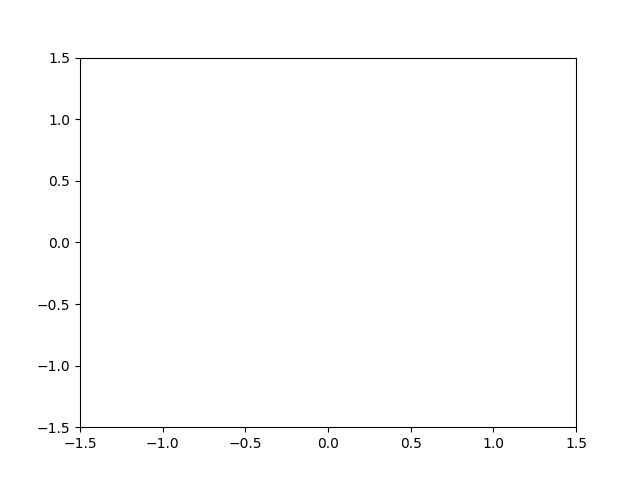

In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
line, = ax.plot([], [], 'o-', lw=2)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    x = np.linspace(0, 2 * np.pi, 10)
    y = np.sin(x + i * 0.1)
    line.set_data(x, y)
    return line,

ani = FuncAnimation(fig, animate, init_func=init, frames=100, blit=True)

plt.show()
